In [16]:
import os
import numpy as np
import pandas as pd

!pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("ramendrapandey/nhanes-2015-2016")

print("Path to dataset files:", path)

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python39\python.exe -m pip install --upgrade pip' command.


Path to dataset files: C:\Users\G526511\.cache\kagglehub\datasets\ramendrapandey\nhanes-2015-2016\versions\1


In [43]:
df = pd.read_csv(os.path.join(path, "NHANES.csv"))

In [44]:
"""Brief explanation of the Column:

SEQN = Respondent sequence number (
SMQ020 = Smoking
RIAGENDR = Gender
RIDAGEYR = Age (years)
DMDEDUC2 = Education level
BMXWT = Weight (kg)
BMXHT = Height (cm)
BMXBMI = BMI
"""

df.head

<bound method NDFrame.head of        SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0     83732     1.0     NaN     1.0       1         1        62         3   
1     83733     1.0     NaN     6.0       1         1        53         3   
2     83734     1.0     NaN     NaN       1         1        78         3   
3     83735     2.0     1.0     1.0       2         2        56         3   
4     83736     2.0     1.0     1.0       2         2        42         4   
...     ...     ...     ...     ...     ...       ...       ...       ...   
5730  93695     2.0     2.0     NaN       1         2        76         3   
5731  93696     2.0     2.0     NaN       2         1        26         3   
5732  93697     1.0     NaN     1.0       1         2        80         3   
5733  93700     NaN     NaN     NaN       1         1        35         3   
5734  93702     1.0     NaN     2.0       2         2        24         3   

      DMDCITZN  DMDEDUC2  ...  BPXSY2  BPXDI2

In [45]:
df[0:5][0:3]

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0


In [46]:
df.shape

(5735, 28)

In [47]:
data = df.loc[:,('SEQN','SMQ020','RIAGENDR','RIDAGEYR','DMDEDUC2','BMXWT','BMXHT','BMXBMI')]
data.head()

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


In [49]:
# Update Column Names
data.columns = ['seqn','smoking','gender','age','education','weight','height','bmi']
data.head()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3


In [50]:
# Data Clenaing
# Check for duplicates, null values or missing data. Check for outliers

duplicateRow = data[data.duplicated()]
duplicateRow

,seqn,smoking,gender,age,education,weight,height,bmi


In [51]:
# Drop Seqn column as it doesn't carry relevant information
data.drop(columns = 'seqn', inplace = True)
data.head()

,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3


In [56]:
data.isnull().sum()

smoking      0
gender       0
age          0
education    0
weight       0
height       0
bmi          0
dtype: int64

In [57]:
data.dropna(inplace=True)

In [59]:
# Found outliners
# Read all columns containing numerical data
numerical = ['age', 'weight', 'height', 'bmi']
data[numerical].describe()

,age,weight,height,bmi
count,5406.000000,5406.000000,5406.000000,5406.000000
mean,49.390122,81.715594,166.055679,29.541861
std,17.640915,21.775173,10.107149,7.076574
min,20.000000,32.400000,129.700000,14.500000
25%,34.000000,66.300000,158.600000,24.500000
50%,49.000000,78.500000,165.900000,28.500000
75%,64.000000,93.200000,173.400000,33.200000
max,80.000000,198.900000,202.700000,67.300000


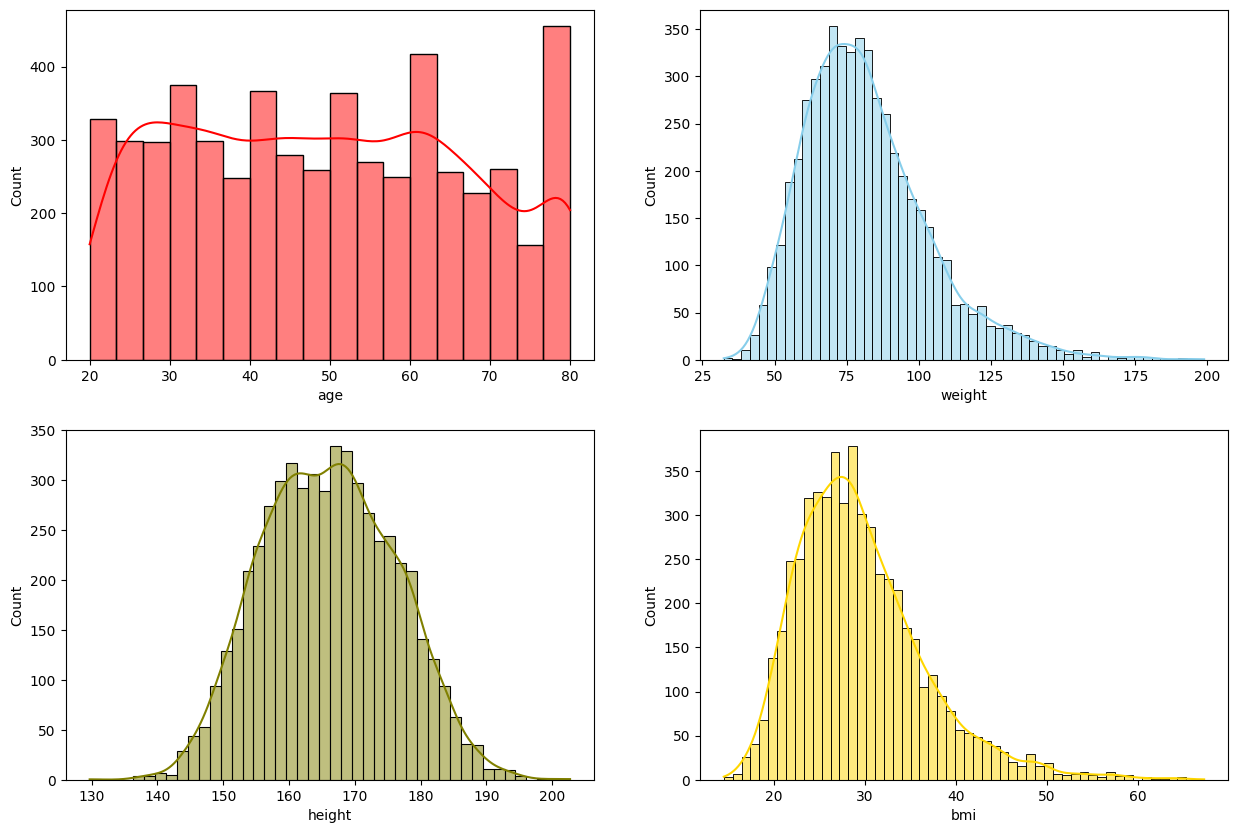

In [63]:
# Import plotly and seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm

# Create histograms
fig, axs = plt.subplots(2,2, figsize=(15, 10))
sns.histplot(data=data, x="age", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[1,1])
plt.show()

<Axes: ylabel='bmi'>

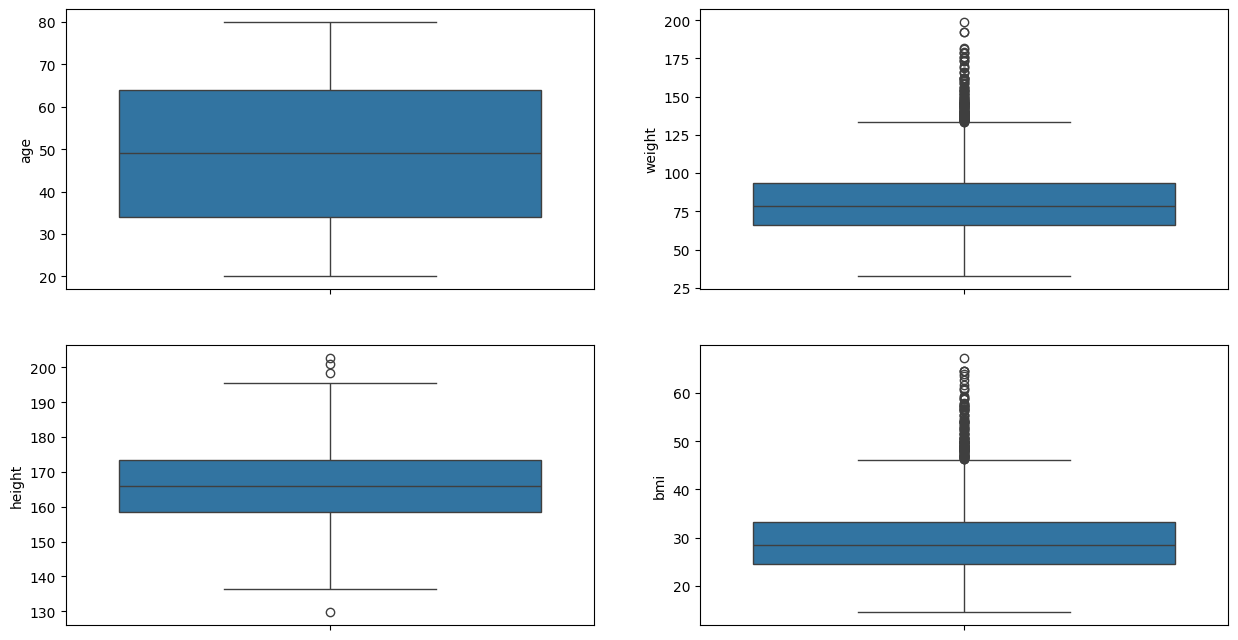

In [65]:
# Create boxplot to observe distribution of numerical value
# a box plot (also known as a box-and-whisker plot) is a visual representation of a dataset's distribution, 
# summarizing key statistics like upper extreme, upper quartile, median, lower quartile, whisker, lower extreme and potenial outlier/single data point
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(data['age'], ax = axs[0,0])
sns.boxplot(data['weight'], ax = axs[0,1])
sns.boxplot(data['height'], ax = axs[1,0])
sns.boxplot(data['bmi'], ax = axs[1,1])

In [66]:
# Height
qh25, qh50, qh75 = np.percentile(data['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = data[(data['height'] > minh) & (data['height'] < maxh)]

In [67]:
# Weight
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [68]:
# BMI
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

In [69]:
data.shape


(5252, 7)

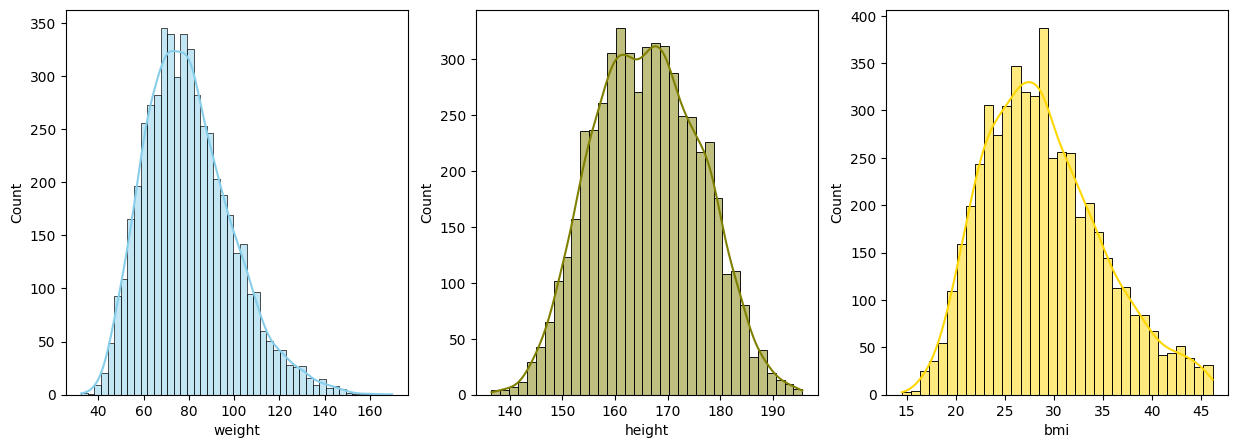

In [70]:
# Check the distribution after removing outliers using histogram
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[1])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

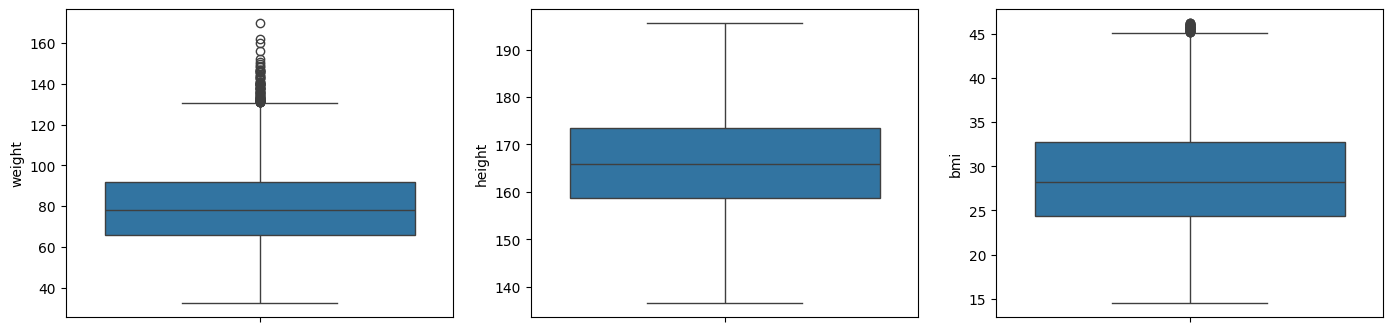

In [71]:
# Check distribution using boxplot after removing outliers

fig, axs = plt.subplots(1,3, figsize=(17, 4))

sns.boxplot(data['weight'], ax = axs[0])
sns.boxplot(data['height'], ax = axs[1])
sns.boxplot(data['bmi'], ax = axs[2])

plt.show()

In [73]:
"""
Performing feature engineering

One hot encoding
Log transform of skewed variables
Pairplot features
"""

data['smoking'] = data['smoking'].replace({1: 'yes', 2:'no', 7: np.nan, 9: np.nan})

data['gender'] = data.gender.replace({1 : 'male', 2 : 'female'})
data['education'] = data.education.replace(
    {1 : '<9th grade', 2 : '9-11th grade', 3 : 'HS or GED', 4 : 'Some college / AA', 5 : 'College or above', 7 : 'Other', 8 : 'Other'}
)

In [74]:
# Get the categorical data
categorical = data[['smoking','gender','education']]
categorical.head() 

,smoking,gender,education
0,yes,male,College or above
1,yes,male,HS or GED
2,yes,male,HS or GED
3,no,female,College or above
4,no,female,Some college / AA


In [75]:
# Get dummies for categorical data
dummy = pd.get_dummies(categorical,drop_first=True)
dummy

,smoking_yes,gender_male,education_9-11th grade,education_<9th grade,education_College or above,education_HS or GED,education_Some college / AA
0,True,True,False,False,True,False,False
1,True,True,False,False,False,True,False
2,True,True,False,False,False,True,False
3,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
5730,True,False,False,False,False,True,False
5731,False,True,False,False,True,False,False
5732,True,False,False,False,False,False,True
5733,True,True,False,True,False,False,False


In [76]:
# Check the skewness of numerical variables
numerical = data[['age', 'weight','height','bmi']]
skew_limit = 0.75 
skew_vals = numerical.skew()
skew_vals

age       0.107088
weight    0.653454
height    0.077404
bmi       0.520106
dtype: float64

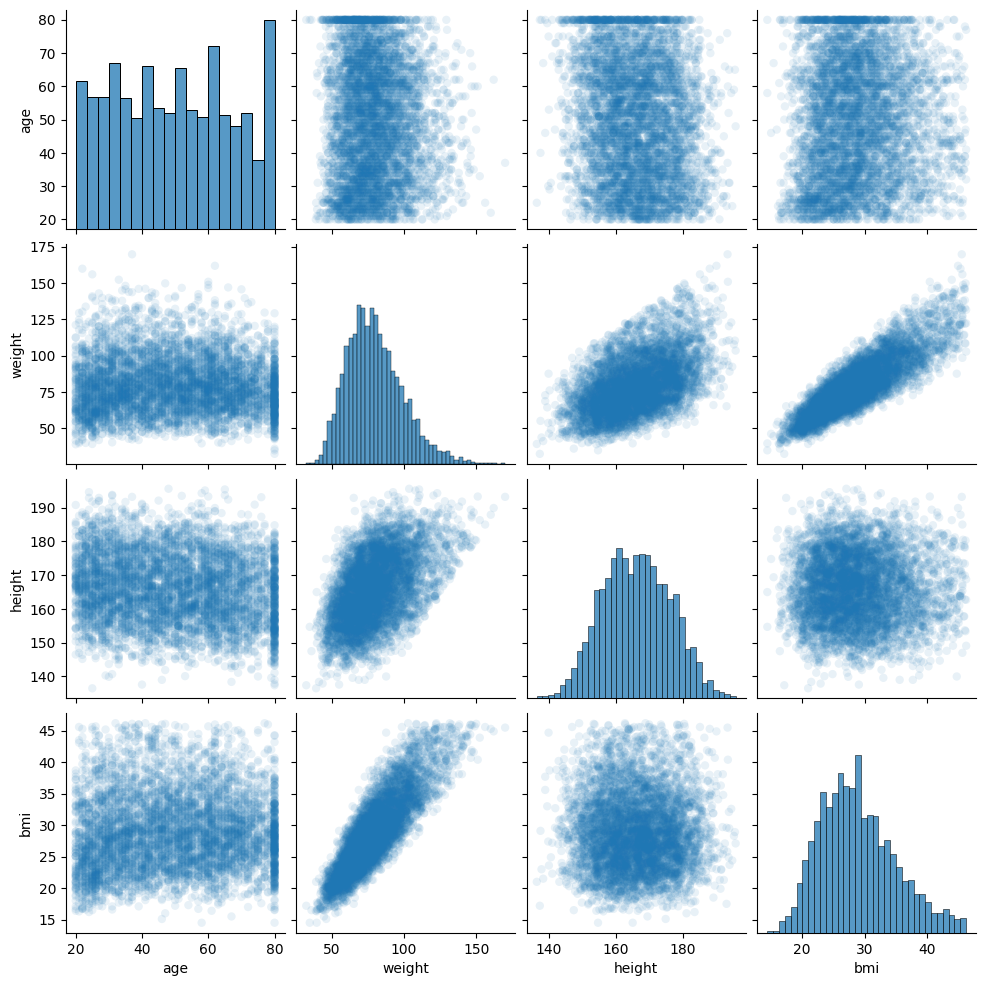

In [77]:
# Pairplot of numerical variables
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

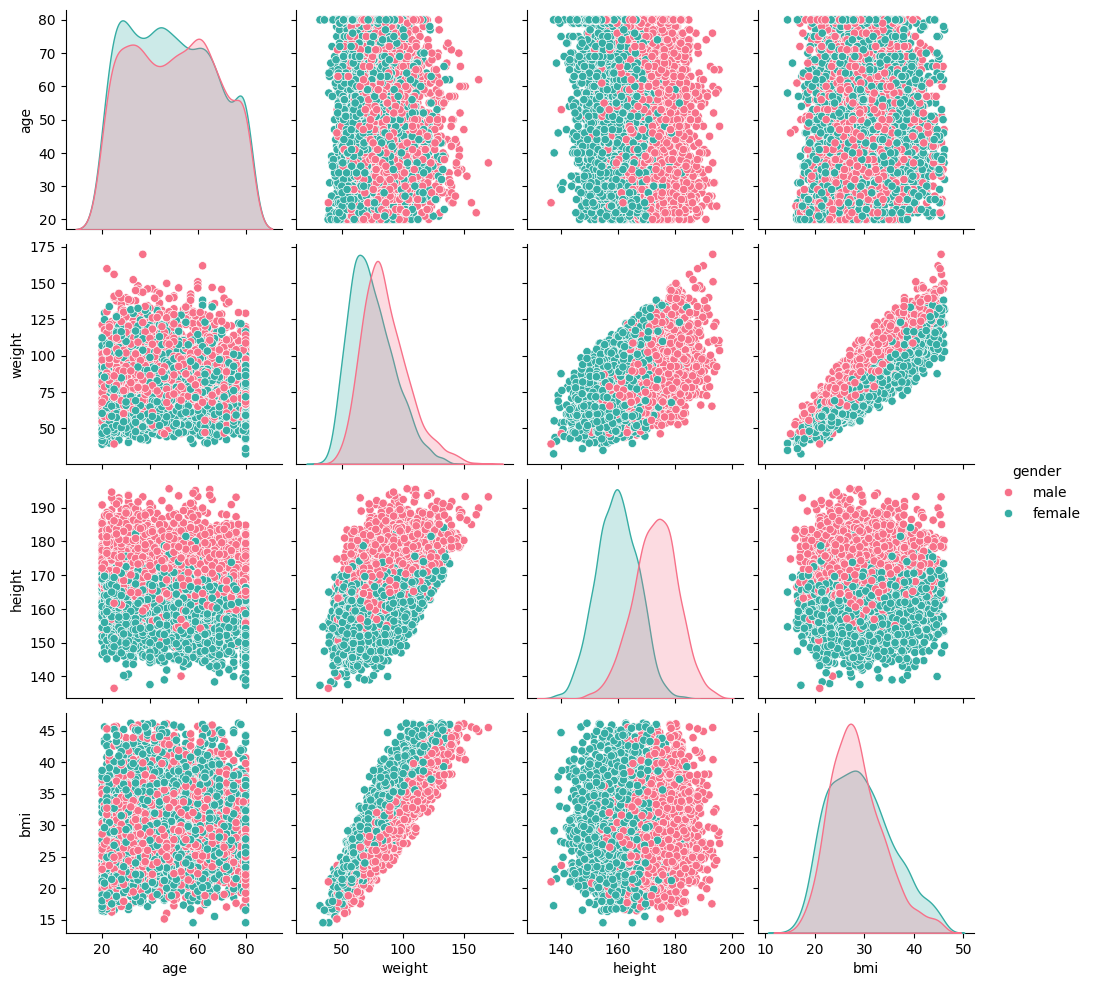

In [78]:
# Pairplot of numerical variables divided by gender
sns.pairplot(data, hue = 'gender', palette = 'husl')

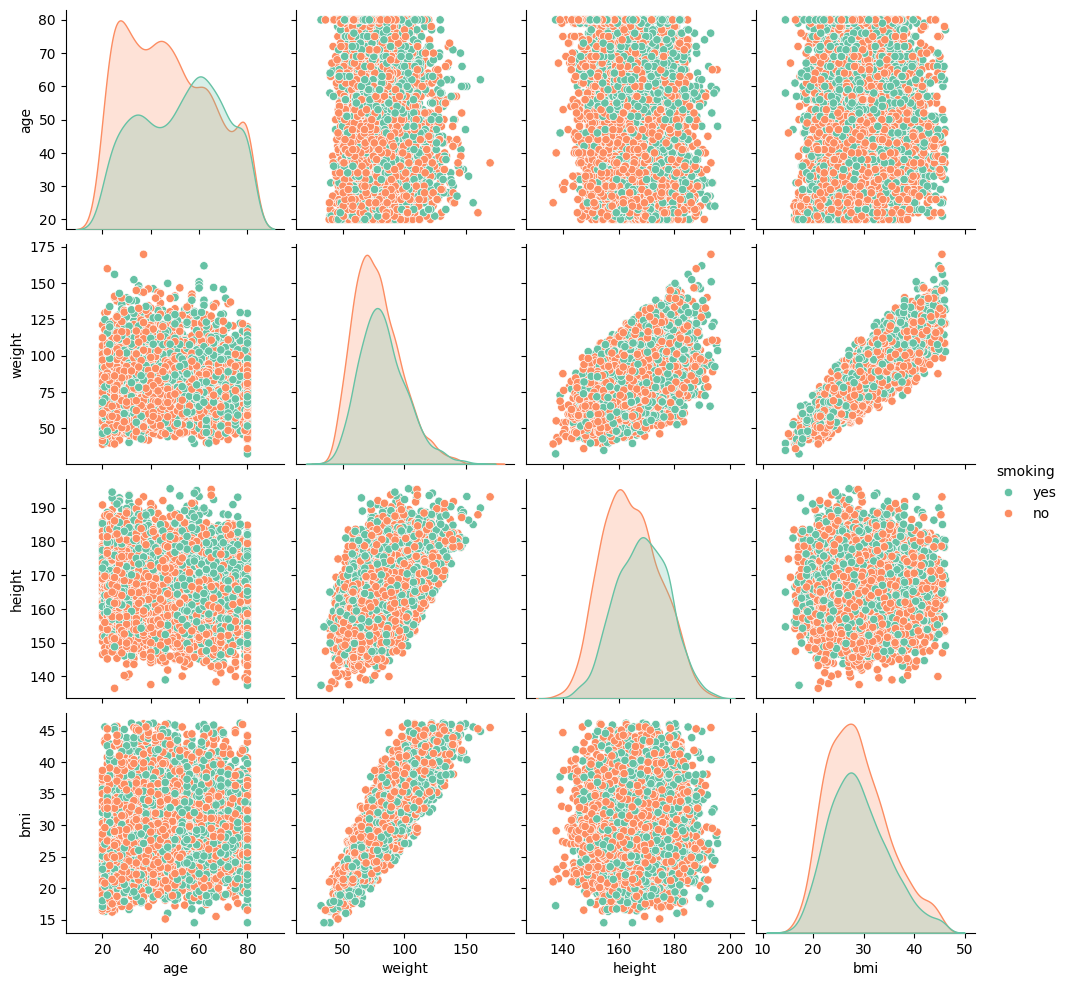

In [79]:
# # Pairplot of numerical variables divided by smoking habit
sns.pairplot(data, hue = 'smoking', palette = 'Set2')